<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Log%C3%ADstica%20II/Caso_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
c=1524700
i=0.2
Cap=740
Danual=740*4.5
Impuesto_exportacion=0.03 #del FOB
Formalidades_aduaneras_origen=0.05 #del FOB
Manipulacion_origen=12000000 #/container
Transporte_origen=7226331 #/container
Transporte_maritimo=28683756
Seguro=0.03 #del valor declarado
Formalidades_aduaneras_destino=3112130 # /pedido
Manipulacion_destino=3000000 #/container
Comision_operador= 0.0037 # del CIF
Transporte_destino=6608000 #/Container
Tau=30 #días

In [ ]:
CostoOptimo=''
Qs=np.zeros(3330)
Costos=np.zeros(3330)
Ts=np.zeros(3330)
for Q in range(1,3331):
  n=math.ceil(Q/Cap)
  N=Danual/Q
  T=Q/Danual*12
  FOB= (Q*c + Manipulacion_origen*n+ Transporte_origen*n)/(1-Formalidades_aduaneras_origen-Impuesto_exportacion)

  Costo_Formalidades_aduaneras_origen=FOB*Formalidades_aduaneras_origen
  Costo_Impuesto_exportacion=FOB*Impuesto_exportacion
  Costo_Seguro=Q*c*Seguro

  CIF=FOB+Transporte_maritimo*n+Costo_Seguro

  Costo_Comision_operador=CIF*Comision_operador

  CostoTotalImportacion=N*(CIF+Formalidades_aduaneras_destino+Manipulacion_destino*n+Transporte_destino*n+Costo_Comision_operador)
  cprima = CostoTotalImportacion/Q/N
  Costo_inv_bodega = i*cprima*Q/2
  Costo_inv_transito = i*c*Danual*Tau/360

  CostoTotal=CostoTotalImportacion+Costo_inv_bodega+Costo_inv_transito
  if CostoOptimo=='':
    CostoOptimo=CostoTotal
    Costo_inv_bodegaOptimo=Costo_inv_bodega
    Costo_inv_transitoOptimo=Costo_inv_transito
    Costo_importacionOptimo=CostoTotalImportacion-c*Danual 
    QOptimo=Q
    nOptimo=n
    NOptimo=N
    TOptimo=T
  elif CostoOptimo>CostoTotal:
    CostoOptimo=CostoTotal
    Costo_inv_bodegaOptimo=Costo_inv_bodega
    Costo_inv_transitoOptimo=Costo_inv_transito
    Costo_importacionOptimo=CostoTotalImportacion-c*Danual 
    QOptimo=Q
    nOptimo=n
    NOptimo=N
    TOptimo=T
  Qs[Q-1]=Q
  Costos[Q-1]=CostoTotal
  Ts[Q-1]=T
print('\nCosto Optimo=',CostoOptimo,'\nCon Q optimo=',QOptimo,'\nCon n Optimo=',nOptimo,'\nCon N Optimo=',NOptimo,'\nCon T Optimo=',TOptimo)


Costo Optimo= 6190595870.99742 
Con Q optimo= 740 
Con n Optimo= 1 
Con N Optimo= 4.5 
Con T Optimo= 2.6666666666666665


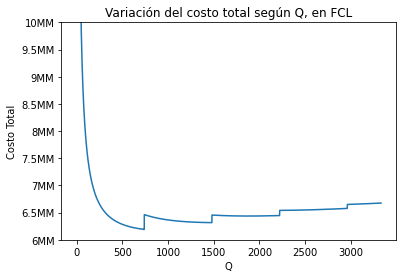

In [ ]:
plt.plot(Qs,Costos)
plt.ylim((6000000000,10000000000))
plt.ylabel('Costo Total')
plt.xlabel('Q')
plt.title('Variación del costo total según Q, en FCL')
plt.yticks([6000000000, 6500000000, 7000000000, 7500000000, 8000000000, 8500000000, 9000000000, 9500000000, 10000000000],['6MM', '6.5MM', '7MM', '7.5MM','8MM', '8.5MM','9MM', '9.5MM','10MM'])
plt.savefig("Variación del costo total según Q, en FCL")
plt.show()

In [ ]:
Transporte_maritimo_parcial=Transporte_maritimo*0.7
CostoOptimoParcial=''
QsParciales=np.zeros(3330)
CostosParciales=np.zeros(3330)
TsParciales=np.zeros(3330)
for Q in range(1,3331):
  n=Q/Cap
  N=Danual/Q
  T=Q/Danual*12
  nparcial=n%1
  ncompleto=n//1
  if nparcial>0.7:
    ncompleto=ncompleto+1
    nparcial=0
    n=math.ceil(Q/Cap)
  if nparcial>0:
    Formalidades_aduaneras_destino_parcial=Formalidades_aduaneras_destino*1.5
    Manipulacion_destino_parcial=Manipulacion_destino*1.5
    Manipulacion_origen_parcial=Manipulacion_origen*1.5
  else:
    Formalidades_aduaneras_destino_parcial=Formalidades_aduaneras_destino
    Manipulacion_destino_parcial=Manipulacion_destino
    Manipulacion_origen_parcial=Manipulacion_origen
  if nparcial!=0:
    nparcial=1
  else:
    nparcial=0
  FOB= (Q*c + Manipulacion_origen*ncompleto+ Manipulacion_origen_parcial*nparcial+Transporte_origen*n)/(1-Formalidades_aduaneras_origen-Impuesto_exportacion)

  Costo_Formalidades_aduaneras_origen=FOB*Formalidades_aduaneras_origen
  Costo_Impuesto_exportacion=FOB*Impuesto_exportacion
  Costo_Seguro=Q*c*Seguro

  CIF=FOB+Transporte_maritimo*ncompleto+Transporte_maritimo_parcial*nparcial+Costo_Seguro

  Costo_Comision_operador=CIF*Comision_operador

  CostoTotalImportacion=N*(CIF+Formalidades_aduaneras_destino_parcial+Manipulacion_destino*ncompleto+Manipulacion_destino_parcial*nparcial+Transporte_destino*n+Costo_Comision_operador)
  cprima = CostoTotalImportacion/Q/N
  Costo_inv_bodega = i*cprima*Q/2
  Costo_inv_transito = i*c*Danual*Tau/360

  CostoTotal=CostoTotalImportacion+Costo_inv_bodega+Costo_inv_transito
  if CostoOptimoParcial=='':
    CostoOptimoParcial=CostoTotal
    Costo_inv_bodegaOptimoParcial=Costo_inv_bodega
    Costo_inv_transitoOptimoParcial=Costo_inv_transito
    Costo_importacionOptimoParcial=CostoTotalImportacion-c*Danual     
    QOptimoParcial=Q
    nOptimoParcial=n
    NOptimoParcial=N
    TOptimoParcial=T
  elif CostoOptimoParcial>CostoTotal:
    CostoOptimoParcial=CostoTotal
    Costo_inv_bodegaOptimoParcial=Costo_inv_bodega
    Costo_inv_transitoOptimoParcial=Costo_inv_transito
    Costo_importacionOptimoParcial=CostoTotalImportacion-c*Danual    
    QOptimoParcial=Q
    nOptimoParcial=n
    NOptimoParcial=N
    TOptimoParcial=T
  QsParciales[Q-1]=Q
  CostosParciales[Q-1]=CostoTotal
  TsParciales[Q-1]=T
print('\nCosto Optimo=',CostoOptimoParcial,'\nCosto Optimo de inventario en CD=',Costo_inv_bodegaOptimoParcial,'\nCosto Optimo de inventario en Tránsito=',Costo_inv_transitoOptimoParcial,'\nCon Q optimo=',QOptimoParcial,'\nCon n Optimo=',nOptimoParcial,'\nCon N Optimo=',NOptimoParcial,'\nCon T Optimo=',TOptimoParcial)


Costo Optimo= 6190595870.99742 
Costo Optimo de inventario en CD= 132738587.4129874 
Costo Optimo de inventario en Tránsito= 84620850.0 
Con Q optimo= 740 
Con n Optimo= 1.0 
Con N Optimo= 4.5 
Con T Optimo= 2.6666666666666665


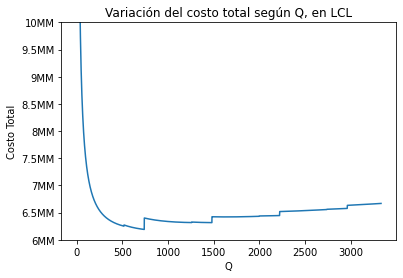

In [ ]:
plt.plot(QsParciales,CostosParciales)
plt.ylim((6000000000,10000000000))
plt.ylabel('Costo Total')
plt.xlabel('Q')
plt.title('Variación del costo total según Q, en LCL')
plt.yticks([6000000000, 6500000000, 7000000000, 7500000000, 8000000000, 8500000000, 9000000000, 9500000000, 10000000000],['6MM', '6.5MM', '7MM', '7.5MM','8MM', '8.5MM','9MM', '9.5MM','10MM'])
#plt.savefig("Variación del costo total según Q, en LCL")
plt.show()

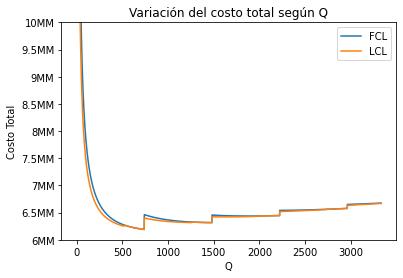

In [ ]:
plt.plot(Qs,Costos,label='FCL')
plt.plot(QsParciales,CostosParciales,label='LCL')
plt.legend()
plt.ylim((6000000000,10000000000))
plt.ylabel('Costo Total')
plt.xlabel('Q')
plt.title('Variación del costo total según Q')
plt.yticks([6000000000, 6500000000, 7000000000, 7500000000, 8000000000, 8500000000, 9000000000, 9500000000, 10000000000],['6MM', '6.5MM', '7MM', '7.5MM','8MM', '8.5MM','9MM', '9.5MM','10MM'])
plt.savefig("Variación del costo total según Q")
plt.show()

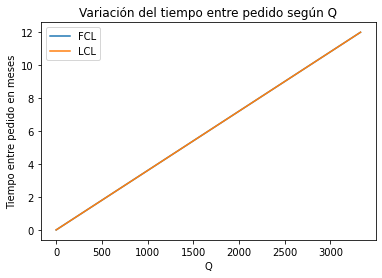

In [ ]:
plt.plot(Qs,Ts,label='FCL')
plt.plot(QsParciales,TsParciales,label='LCL')
plt.legend()

plt.ylabel('Tiempo entre pedido en meses')
plt.xlabel('Q')
plt.title('Variación del tiempo entre pedido según Q')

#plt.savefig("Variación del tiempo entre pedido según Q")
plt.show()

In [ ]:
dif=CostoOptimo-CostoOptimoParcial
dif

23567365.8238945

In [ ]:
print(dif/CostoOptimoParcial*100,'%')

0.38215107655370517 %


In [ ]:
Tabla = pd.DataFrame({'Opciones': ['FCL', 'LCL'],'Costo Total':[CostoOptimo, CostoOptimoParcial] , 'Tamaño de pedido':[QOptimo, QOptimoParcial],'Costo Anual de importación':[Costo_importacionOptimo,Costo_importacionOptimoParcial ], 'Costo Anual de inventario en tránsito':[Costo_inv_transitoOptimo,Costo_inv_transitoOptimoParcial],'Costo Anual de inventario en CD':[Costo_inv_bodegaOptimo,Costo_inv_bodegaOptimoParcial],'Cantidad de contenedores':[nOptimo,nOptimoParcial],'Cantidad de envíos al año':[NOptimo,NOptimoParcial]})
Tabla.set_index('Opciones', inplace=True)
Tabla 

,Costo Total,Tamaño de pedido,Costo Anual de importación,Costo Anual de inventario en tránsito,Costo Anual de inventario en CD,Cantidad de contenedores,Cantidad de envíos al año
Opciones,,,,,,,
FCL,6.190596e+09,740,8.959854e+08,84620850.0,1.327386e+08,1.0,4.500000
LCL,6.167029e+09,518,9.119907e+08,84620850.0,9.316598e+07,0.7,6.428571


In [ ]:
Utilidad=np.zeros(len(Costos))
UtilidadParcial=np.zeros(len(Costos))
for j in range(0,len(Costos)):
  Utilidad[j]=Danual*3049400-Costos[j]
  UtilidadParcial[j]=Danual*3049400-CostosParciales[j]

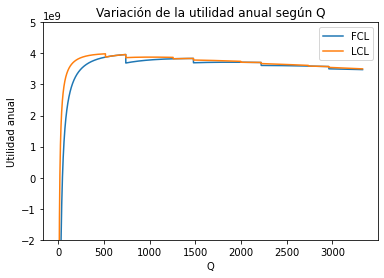

In [ ]:
plt.plot(Qs,Utilidad,label='FCL')
plt.plot(QsParciales,UtilidadParcial,label='LCL')
plt.legend()
plt.ylim((-2000000000,5000000000))
plt.ylabel('Utilidad anual')
plt.xlabel('Q')
plt.title('Variación de la utilidad anual según Q')
#plt.yticks([6000000000, 6500000000, 7000000000, 7500000000, 8000000000, 8500000000, 9000000000, 9500000000, 10000000000],['6MM', '6.5MM', '7MM', '7.5MM','8MM', '8.5MM','9MM', '9.5MM','10MM'])
#plt.savefig("Variación del costo total según Q")
plt.show()

In [ ]:
Tabla.loc['Dif']=Tabla.loc['FCL']-Tabla.loc['LCL']

In [ ]:
Tabla

,Costo Total,Tamaño de pedido,Costo Anual de importación,Costo Anual de inventario en tránsito,Costo Anual de inventario en CD,Cantidad de contenedores,Cantidad de envíos al año
Opciones,,,,,,,
FCL,6.190596e+09,740.0,8.959854e+08,84620850.0,1.327386e+08,1.0,4.500000
LCL,6.167029e+09,518.0,9.119907e+08,84620850.0,9.316598e+07,0.7,6.428571
Dif,2.356737e+07,222.0,-1.600524e+07,0.0,3.957261e+07,0.3,-1.928571
